# Python Fundamentals Bootcamp - Friday: pandas dataframes

- Pandas is one of the most commonly used Python packages/libraries for data science.<br><br>
- Pandas is Python's answer for making two dimensional tables (ala Excel and SQL).<br><br>
- Pandas calls a table a "DataFrame".<br><br>
- Pandas DataFrames are used by Python's other packages for statistical analysis, data manipulation, and data visualization.<br><br>
- Pandas DataFrames can be exported as .csv and other files.<br><br>

I've never met someone who loves pandas. The module, not the animal. The syntax isn't very instinctual, but it is a good tool for working with spreadsheets inside Python (even if you have to look things up a lot).

### import pandas

Because pandas is one of the most commonly used Python packages, it often gets imported as a shortened version of it's actual name. This makes it quicker to type.

In [1]:
import pandas as pd

### <br><br>about the practice data

We will be working with a dataset from forest fires in NE Portugal. I have included the dataset as a csv file in today's materials, but the data is available publically at this site: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

The notebook also uses different datasets at the end of the file to practice loading different file formats.

#### If you are using Google Colab, you must run the next line of code. *If you are NOT using Google Colab, do NOT run the next line.*

### <br>loading a csv file

We will use the function `pd.read_csv()`. This will automatically create a DataFrame object, which we are saving as `df`. `df` is a common variable name for a DataFrame. You can open the file, define it as a Pandas DataFrame, assign it to a variable, and close the file in one line.

In [2]:
df = pd.read_csv("forestfires.csv")

### <br>viewing the DataFrame

In [3]:
df

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<br>Take a minute to look at the data. The DataFrame will have a slightly different look on Colab and Jupyter, and on different versions of Jupyter.
<br><br>The number at the beginning of each row is called an **index**. The index was automatically assigned by pandas when the dataset was loaded. It was not in the original csv file. It is merely a series of consecutive numbers going down the rows. The rows were loaded in whatever order they were in the csv file.

<br><br>There are ways to view pieces of the DataFrame. Try these to see what they do:

In [4]:
df.head()

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
df.head(10)

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [6]:
df.tail()

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [7]:
df.tail(2)

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.0


In [8]:
df.sample()

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
384,8,4,aug,sat,91.6,273.8,819.1,7.7,21.3,44,4.5,0.0,12.18


In [9]:
df.sample(6)

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
135,3,5,aug,sat,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00
79,1,2,aug,tue,91.0,121.2,561.6,7.0,21.6,19,6.7,0.0,0.00
317,4,4,sep,thu,92.4,96.2,739.4,8.6,19.2,24,4.9,0.0,3.78
361,4,3,sep,fri,92.5,122.0,789.7,10.2,17.3,45,4.0,0.0,3.94
472,8,3,jun,mon,88.2,96.2,229.0,4.7,14.3,79,4.0,0.0,1.94
362,7,4,sep,fri,88.2,55.2,732.3,11.6,15.2,64,3.1,0.0,0.52


### <br>getting basic info about the DataFrame

In [10]:
len(df)

517

In [11]:
df.describe()

,X,Y,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [12]:
df.shape

(517, 13)

In [13]:
df.size

6721

In [14]:
517 * 13

6721

You may have noticed that `df.size` and `df.shape` do not have parentheses. These are called **attributes**. They tell you something about the object and don't do anything to or with the object. Not all objects have attributes, but they will only work without the parentheses. 

In [15]:
df.size()

TypeError: 'numpy.int64' object is not callable

Pandas was built using another common Python module, numpy.

#### <br>return the row indices or column names

In [16]:
df.index

RangeIndex(start=0, stop=517, step=1)

In [17]:
df.columns

Index(['X', 'Y', 'month', 'day', 'fuel_code', 'moisture_code', 'drought_code',
       'initial_spread_code', 'temp', 'humidity', 'wind', 'rain',
       'area_burned'],
      dtype='object')

<br>Hmm. Those look strange because they are pandas objects. You can make them into a list so that they are easier to work with:

In [18]:
len(list(df.index))

517

In [19]:
column_names = list(df.columns)
print(column_names)

['X', 'Y', 'month', 'day', 'fuel_code', 'moisture_code', 'drought_code', 'initial_spread_code', 'temp', 'humidity', 'wind', 'rain', 'area_burned']


#### <br>transposing a dataframe

In [20]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
X,7,7,7,8,8,8,8,8,8,7,...,2,1,5,6,8,4,2,7,1,6
Y,5,4,4,6,6,6,6,6,6,5,...,4,2,4,5,6,3,4,4,4,3
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
fuel_code,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91,92.5,...,91,91,91,91,81.6,81.6,81.6,81.6,94.4,79.5
moisture_code,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146,3
drought_code,94.3,669.1,686.9,77.5,102.2,488,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
initial_spread_code,5.1,6.7,6.7,9,9.6,14.7,8.5,10.7,7,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18,14.6,8.3,11.4,22.2,24.1,8,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
humidity,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31


<br>Let's see if that changed our DataFrame object:

In [21]:
df

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<br>We could save a version of the transposed df:

In [22]:
df_t = df.T
df_t

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
X,7,7,7,8,8,8,8,8,8,7,...,2,1,5,6,8,4,2,7,1,6
Y,5,4,4,6,6,6,6,6,6,5,...,4,2,4,5,6,3,4,4,4,3
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
fuel_code,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91,92.5,...,91,91,91,91,81.6,81.6,81.6,81.6,94.4,79.5
moisture_code,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146,3
drought_code,94.3,669.1,686.9,77.5,102.2,488,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
initial_spread_code,5.1,6.7,6.7,9,9.6,14.7,8.5,10.7,7,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18,14.6,8.3,11.4,22.2,24.1,8,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
humidity,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31


### <br>select columns or rows

To create a DataFrame with only some columns, you use indexing, and you pass it a list of the columns that you want to include:

In [23]:
my_columns = ["month", "day", "area_burned"]
df[my_columns]

,month,day,area_burned
0,mar,fri,0.00
1,oct,tue,0.00
2,oct,sat,0.00
3,mar,fri,0.00
4,mar,sun,0.00
...,...,...,...
512,aug,sun,6.44
513,aug,sun,54.29
514,aug,sun,11.16
515,aug,sat,0.00


<br>OR you could just include the list inside the indexing. This creates two sets of square brackets, which looks a little silly, but it works!

In [24]:
df[["month", "day", "area_burned"]]

,month,day,area_burned
0,mar,fri,0.00
1,oct,tue,0.00
2,oct,sat,0.00
3,mar,fri,0.00
4,mar,sun,0.00
...,...,...,...
512,aug,sun,6.44
513,aug,sun,54.29
514,aug,sun,11.16
515,aug,sat,0.00


<br>If you want to return just one column as a DataFrame, you still use the list inside the index:

In [25]:
df[["temp"]]

,temp
0,8.2
1,18.0
2,14.6
3,8.3
4,11.4
...,...
512,27.8
513,21.9
514,21.2
515,25.6


### <br><br>Exercise 1

Here's a reminder of what the DataFrame looks like:

In [26]:
df.head()

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Write code to return the humidity, wind, and rain columns:

Write code to return the day column:

<br><br><br>If you only index the column name, without putting it in a list, you get a different type of object - the **Series** object.

In [27]:
df["temp"]

0       8.2
1      18.0
2      14.6
3       8.3
4      11.4
       ... 
512    27.8
513    21.9
514    21.2
515    25.6
516    11.8
Name: temp, Length: 517, dtype: float64

<br>A Series object only returns the values from one column. It can be turned into a list, which is very convenient:

In [28]:
temp_list = list(df["temp"])
print(temp_list)

[8.2, 18.0, 14.6, 8.3, 11.4, 22.2, 24.1, 8.0, 13.1, 22.8, 17.8, 19.3, 17.0, 21.3, 26.4, 22.9, 15.1, 16.7, 15.9, 9.3, 18.3, 19.1, 21.0, 19.5, 23.7, 16.3, 19.0, 19.4, 30.2, 22.8, 25.4, 11.2, 20.6, 17.7, 21.2, 18.2, 21.7, 11.3, 17.8, 14.1, 23.3, 18.4, 16.6, 19.6, 12.9, 25.9, 14.7, 23.0, 11.8, 11.0, 20.8, 21.5, 20.4, 20.4, 17.6, 27.7, 17.8, 13.8, 13.9, 12.3, 11.5, 5.5, 18.8, 20.8, 23.1, 18.6, 23.0, 19.6, 19.6, 17.2, 15.8, 17.7, 15.6, 17.3, 27.6, 6.7, 15.7, 8.3, 14.7, 21.6, 19.5, 17.9, 18.6, 16.6, 20.2, 21.5, 25.4, 22.4, 25.3, 17.4, 14.7, 17.4, 20.8, 18.2, 23.4, 17.8, 12.7, 17.4, 11.6, 19.8, 19.8, 14.4, 20.1, 24.1, 5.3, 12.7, 18.2, 21.4, 20.3, 17.4, 13.7, 18.8, 22.8, 18.9, 15.8, 15.5, 11.6, 15.2, 10.6, 19.6, 10.3, 17.1, 22.5, 17.9, 19.8, 20.6, 9.0, 17.2, 15.9, 15.4, 15.4, 14.0, 10.6, 17.6, 14.9, 17.6, 17.2, 15.6, 18.0, 21.7, 21.9, 23.3, 21.2, 16.6, 23.8, 27.4, 13.2, 24.2, 17.4, 23.7, 23.2, 24.8, 24.6, 20.1, 29.6, 16.4, 28.6, 18.4, 20.5, 19.0, 16.1, 20.3, 15.2, 17.8, 17.8, 5.3, 16.6, 23.4, 1

### <br><br>Exercise 2

Write code to return a list of data in the area_burned column:

In [ ]:
area_data = 

In [ ]:
print(area_data)

<br><br><br>If we want to return a DataFrame with only some rows, we can index a range:

In [29]:
df[0:10]

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [30]:
df[495:-12]

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
495,6,6,aug,mon,96.2,175.5,661.8,16.8,23.9,42,2.2,0.0,0.00
496,4,5,aug,mon,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,2.77
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95
504,4,3,aug,wed,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59


<br>If you only want a single row, you still need to use indexing with a `:`:

In [79]:
df[4:5]

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
4,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


<br>*Note: There are other ways to index individual rows and even individual data points in a DataFrame, but we will not be covering them today. There is a Next Steps in Python Lunch Lesson on this topic scheduled for Monday, July 20.*

### <br><br>using a boolean to return parts of a DataFrame

To return a DataFrame that only has rows that meet a certain condition, we use this syntax. The outer `df[]` lets Python know that you want the answer to be returned as a DataFrame, meaning you want all the columns included in the output:

In [31]:
df[df["month"] == "aug"]

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
12,6,5,aug,fri,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00
23,7,4,aug,sat,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16


In [32]:
df[df["temp"] > 20]

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00
13,6,5,sep,mon,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0,0.00
14,6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16


### <br><br>Exercise 3

Write code to return a DataFrame that only includes rows that had no rain:

Write code to return a DataFrame that only includes rows with a day that is not "sun":

<br><br><br>If you don't use the outer `df[]` the return is a Series object that returns the boolean value for each row based on the condition you set:

In [33]:
df["month"] == "aug"

0      False
1      False
2      False
3      False
4      False
       ...  
512     True
513     True
514     True
515     True
516    False
Name: month, Length: 517, dtype: bool

### <br><br>renaming columns

Here's what our column names look like:

In [34]:
df.head()

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Four of the columns end in "\_code". Let's remove that part from the column names. We can use the `rename()` method. We need to pass the function a dictionary of the old name to be replaced as the key and the new name as the value.

In [35]:
df.rename(columns = {"moisture_code": "moisture", "fuel_code": "fuel"})

,X,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [36]:
df.head()

,X,Y,month,day,fuel_code,moisture_code,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Uh-oh, the change didn't stick. We've encountered this before with strings, so we know the answer - reassign it to a variable.

In [37]:
df = df.rename(columns = {"moisture_code": "moisture", "fuel_code": "fuel"})

In [38]:
df.head()

,X,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### <br><br>Exercise 4

Write code to remove "\_code" from the ends of the drought and initial_spread column names:

In [ ]:
df = 

In [ ]:
df.head()

### <br><br><br>dropping rows and columns

Let's drop a single row from the DataFrame. How about row 2? You still have to assign `df` to a variable to make the change permanent:

In [39]:
df = df.drop(2)

In [40]:
df.head()

,X,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


<br>The index numbers did not reset when we dropped a row. 2 is missing!

We can reset the index and pretend like 2 was never there. The `reset_index()` function takes one keyword argument. If we don't pass this argument, `drop=True`, an extra column will get added to our DataFrame containing the old index numbers.

In [41]:
df = df.reset_index(drop=True)

In [42]:
df.head()

,X,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
4,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


<br><br><br>The `drop()` function defaults to dropping rows. If we want to drop a column, we need to add one more argument. Let's drop the "X" column:

In [43]:
df = df.drop("X", axis=1)

In [44]:
df.head()

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
4,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


### <br><br>Exercise 5

Write code to view the last 5 rows of the DataFrame:

Now write code to drop the very last row:

Write code to remove the "Y" column:

In [45]:
df.head()

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
4,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


### <br><br><br>data aggregation

Data aggregation means taking many data points and reducing them to one number, whether it's a count, sum, mean, or other single statistic. Here are some DataFrame method functions:

- [`.count()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
- [`.sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)
- [`.mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
- [`.median()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html)
- [`.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html)
- [`.max()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html)
- [`.unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)
- [`.nunique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)
- [`.std()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)   #Standard error
- [`.var()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)   #Variance
- And more!

If you use a method function on the entire dataset, it will try its best to execute the method for all columns.

In [50]:
df.count()

Y                      516
month                  516
day                    516
fuel                   516
moisture               516
drought_code           516
initial_spread_code    516
temp                   516
humidity               516
wind                   516
rain                   516
area_burned            516
dtype: int64

In [51]:
df.min()

Y                         2
month                   apr
day                     fri
fuel                   18.7
moisture                1.1
drought_code            7.9
initial_spread_code       0
temp                    2.2
humidity                 15
wind                    0.4
rain                      0
area_burned               0
dtype: object

In [52]:
df.sum()

Y                                                                   2219
month                  maroctmarmaraugaugaugsepsepsepsepaugsepsepsepm...
day                    frituefrisunsunmonmontuesatsatsatfrimonwedfris...
fuel                                                             46772.7
moisture                                                         57277.3
drought_code                                                      282598
initial_spread_code                                               4657.5
temp                                                              9751.1
humidity                                                           22864
wind                                                              2075.8
rain                                                                11.2
area_burned                                                      6642.05
dtype: object

In [53]:
df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

<br>Not all functions will work on the entire DataFrame. Most of the time you are interested in only a subset of the data:

In [58]:
df["day"].unique()

array(['fri', 'tue', 'sun', 'mon', 'sat', 'wed', 'thu'], dtype=object)

In [59]:
list(df["day"].unique())

['fri', 'tue', 'sun', 'mon', 'sat', 'wed', 'thu']

In [60]:
df["month"].nunique()

12

In [62]:
df["temp"].var()

33.74657616467224

### <br><br>Exercise 6

Write code to find the mean humidity on the days of fire events:

Write code to find the coldest temperature on the day of a fire event:

### <br><br><br>more subsampling

Earlier, we learned how to select rows based on one condition in a column. Here we will select with multiple conditions. The syntax requires us to 1. contain each boolean in parentheses, and 2. use `& | !` instead of `and or not`.

Fires on Fridays when the temperature was over 30 Celcius:

In [76]:
df[(df["day"] == "fri") & (df["temp"] > 30)]

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
491,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.0


Fires in either June or July:

In [77]:
df[(df["month"] == "jun") | (df["month"] == "jul")]

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
21,4,jun,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.00
39,4,jul,tue,79.5,60.6,366.7,1.5,23.3,37,3.1,0.0,0.00
46,6,jul,mon,94.2,62.3,442.9,11.0,23.0,36,3.1,0.0,0.00
137,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
142,2,jul,sat,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,0.71
149,5,jun,fri,92.5,56.4,433.3,7.1,23.2,39,5.4,0.0,1.19
150,9,jul,sun,90.1,68.6,355.2,7.2,24.8,29,2.2,0.0,1.36
151,4,jul,sat,90.1,51.2,424.1,6.2,24.6,43,1.8,0.0,1.43
222,2,jul,fri,88.3,150.3,309.9,6.8,13.4,79,3.6,0.0,37.02
284,5,jul,sun,93.9,169.7,411.8,12.3,23.4,40,6.3,0.0,0.00


### <br><br>Exercise 7

Write code to return rows with fires on days with humidity under 30 and wind under 2:

Write code to return rows with fires on days with a drought code over 600 or a moisture code under 50:

### <br><br>groupby

Often, you will want to calculate the statistics for a particular subgroup of a data column.

For example, let's say we want to ask if more fires happen on certain days of the week. This code will tell you the count for every column in the DataFrame except the column that you are using to group your data (i.e. "day").

In [80]:
df.groupby("day").count()

,Y,month,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
day,,,,,,,,,,,
fri,85,85,85,85,85,85,85,85,85,85,85
mon,74,74,74,74,74,74,74,74,74,74,74
sat,83,83,83,83,83,83,83,83,83,83,83
sun,95,95,95,95,95,95,95,95,95,95,95
thu,61,61,61,61,61,61,61,61,61,61,61
tue,64,64,64,64,64,64,64,64,64,64,64
wed,54,54,54,54,54,54,54,54,54,54,54


<br>It looks like weekends are worse than weekdays. (The next section will show you how to sort the rows.)

<br>If you only want to see the mean for one column in the DataFrame, you can add on the subsampling techniques we learned in part one of this lesson. With this code I will ask, What is the mean area burned on each day of the week?

In [81]:
df.groupby("day")[["area_burned"]].mean()

,area_burned
day,
fri,5.261647
mon,9.547703
sat,25.841687
sun,10.104526
thu,16.345902
tue,12.621719
wed,10.714815


<br>So Saturday fires are also the most destructive fires.

<br>We can also add some other functions to the end of our code, like round:

In [82]:
df.groupby("day")[["area_burned"]].mean().round(2)

,area_burned
day,
fri,5.26
mon,9.55
sat,25.84
sun,10.10
thu,16.35
tue,12.62
wed,10.71


### <br><br>Exercise 8

Write code to count how many fires happened in each month:

Write code to see the mean area burned for fires in each month:

### <br><br>sorting a DataFrame

There are two functions for sorting your DataFrame.

If you want to sort by the index numbers, or if you want to sort by the column names (alphabetically), you use `sort_index`. It can take two arguments: the axis to sort by (row or column) and the order (reverse or not):

The default arguments are to sort by row index with 0 at the top, which is how we've already been viewing the data:

In [83]:
df.sort_index()

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
3,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
4,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
511,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
512,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
513,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
514,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Let's try more arguments:

In [85]:
df.sort_index(ascending=False)

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
515,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00
514,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
513,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
512,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
511,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...
4,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
3,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
2,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
1,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00


In [86]:
df.sort_index(axis=1)

,Y,area_burned,day,drought_code,fuel,humidity,initial_spread_code,moisture,month,rain,temp,wind
0,5,0.00,fri,94.3,86.2,51,5.1,26.2,mar,0.0,8.2,6.7
1,4,0.00,tue,669.1,90.6,33,6.7,35.4,oct,0.0,18.0,0.9
2,6,0.00,fri,77.5,91.7,97,9.0,33.3,mar,0.2,8.3,4.0
3,6,0.00,sun,102.2,89.3,99,9.6,51.3,mar,0.0,11.4,1.8
4,6,0.00,sun,488.0,92.3,29,14.7,85.3,aug,0.0,22.2,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...
511,3,6.44,sun,665.6,81.6,32,1.9,56.7,aug,0.0,27.8,2.7
512,4,54.29,sun,665.6,81.6,71,1.9,56.7,aug,0.0,21.9,5.8
513,4,11.16,sun,665.6,81.6,70,1.9,56.7,aug,0.0,21.2,6.7
514,4,0.00,sat,614.7,94.4,42,11.3,146.0,aug,0.0,25.6,4.0


In [87]:
df.sort_index(axis=1, ascending=False)

,wind,temp,rain,month,moisture,initial_spread_code,humidity,fuel,drought_code,day,area_burned,Y
0,6.7,8.2,0.0,mar,26.2,5.1,51,86.2,94.3,fri,0.00,5
1,0.9,18.0,0.0,oct,35.4,6.7,33,90.6,669.1,tue,0.00,4
2,4.0,8.3,0.2,mar,33.3,9.0,97,91.7,77.5,fri,0.00,6
3,1.8,11.4,0.0,mar,51.3,9.6,99,89.3,102.2,sun,0.00,6
4,5.4,22.2,0.0,aug,85.3,14.7,29,92.3,488.0,sun,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
511,2.7,27.8,0.0,aug,56.7,1.9,32,81.6,665.6,sun,6.44,3
512,5.8,21.9,0.0,aug,56.7,1.9,71,81.6,665.6,sun,54.29,4
513,6.7,21.2,0.0,aug,56.7,1.9,70,81.6,665.6,sun,11.16,4
514,4.0,25.6,0.0,aug,146.0,11.3,42,94.4,614.7,sat,0.00,4


<br><br><br>The second sort function, `sort_values()`, will sort the frame by the data in a column:

In [88]:
df.sort_values(by="area_burned")

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
298,5,jun,sat,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00
299,5,jun,mon,90.4,93.3,298.1,7.5,20.7,25,4.9,0.0,0.00
301,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00
302,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
236,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
478,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
414,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28


In [90]:
df.sort_values(by="day")

,Y,month,day,fuel,moisture,drought_code,initial_spread_code,temp,humidity,wind,rain,area_burned
0,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
352,4,sep,fri,92.1,99.0,745.3,9.6,19.8,47,2.7,0.0,1.72
104,5,mar,fri,85.9,19.5,57.3,2.8,12.7,52,6.3,0.0,0.00
354,4,sep,fri,92.1,99.0,745.3,9.6,20.8,35,4.9,0.0,13.06
355,4,sep,fri,92.1,99.0,745.3,9.6,20.8,35,4.9,0.0,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...
51,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
52,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
379,4,jul,wed,93.7,101.3,458.8,11.9,19.3,39,7.2,0.0,7.73
44,6,sep,wed,94.3,85.1,692.3,15.9,25.9,24,4.0,0.0,0.00


### <br><br>Exercise 9

Write code to sort the DataFrame by the rain column, with the largest values at the top:

### <br><br>basic plotting

Other python packages can help you make beautiful visualizations of your data. With Pandas, you can make several simple plots, including histograms, box and whisker plots, bar graphs, scatter plots, and pie charts. 

We will first make a simple scatter plot of the columns `temp` and `area_burned`. We use the `plot()` function. At the least, we need to include three arguments: the kind of plot to make, the data to use for the x axis, and the data to use for the y axis.

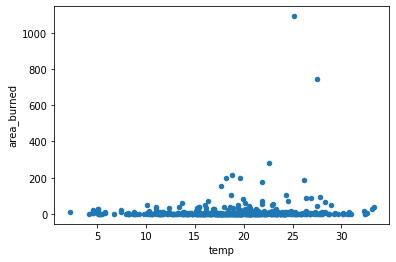

In [92]:
temp_scatter = df.plot(kind="scatter", x="temp", y="area_burned")

<br>Let's make a bar graph of the mean area burned for the days of the week. First we group by day, then subsample only the area burned column, then calculate the means, and finally plot the means. I also added an argument for "title" to this plot.

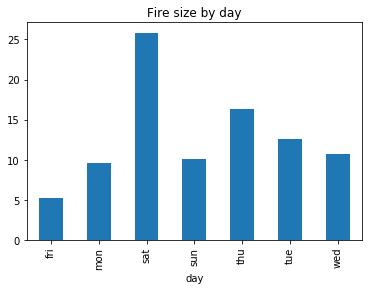

In [94]:
day_bar = df.groupby("day")["area_burned"].mean().plot(kind = 'bar', 
                                                              title = "Fire size by day")

You can reorder the days of the week, but we aren't going to get into that today - I encourage you to come to the Python MatPlotLib workshop in August to learn more about plotting in Python.

### <br><br>Exercise 10

Write code to make a scatter plot with humidity on the x axis and temperature on the y axis. Are they related?

Write code to make a bar chart of the total count of fires each month:

### <br><br>loading other types of files

<br>We can open a tab-separated file using the same function we used to open a csv. We just have to pass another argument to tell it that the delimiter is a tab instead of the default (comma). This dataset contains rankings of profressional racing pigeons.

In [97]:
pigeon_df = pd.read_csv("pigeonRacing.txt", delimiter="\t")

In [98]:
pigeon_df.head()

,Position,Avg Unirate,Name,Racing Pigeon,Color,Sex,Qualifying Race Miles,Average Birdage
0,1,0.26%,Dean Schultz,751 AU 18 PURP,BB,H,"469, 469",612
1,2,1.08%,Dick Fassio,9027 AU 19 SLI,BBAR,H,"579, 500",139
2,3,1.42%,Gary Mosher,32826 AU 17 AA,BKC,H,"494, 539",103
3,4,2.21%,Todd Bartholomew,35624 AU 17 JEDD,BC,H,"547, 468",226
4,5,2.61%,Dustin Maxfield,3322 AU 17 OGN,BB,C,"462, 462",171


<br>We will use a different function to open an Excel file. This file has information about animals and has two sheets within the excel file. We will first load sheet 1 and then sheet 2.

In [100]:
zoo_df = pd.read_excel("zoo.xlsx", sheet_name=0)

In [101]:
zoo_df.head()

,animal,hair,feathers,eggs,milk,airbourne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [104]:
zoo_class_df = pd.read_excel("zoo.xlsx", sheet_name=1)

In [105]:
zoo_class_df.head()

,Unnamed: 0,class
0,1,mammal
1,2,bird
2,3,reptile
3,4,fish
4,5,amphibian


### <br><br>Exercise 11

Try to load two or three files from your own computer into pandas. Try with at least two different file types (csv, tab-delimited, excel).